# ROC Curve and AUC Comparison for Multiple Models

This notebook demonstrates how to compute and compare ROC (Receiver Operating Characteristic) curves and AUC (Area Under the Curve) scores for multiple classification models. ROC curves help evaluate binary classification models by plotting the trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1-Specificity).

**License:** MIT License  
**Copyright:** (c) 2024 Fabricio Batista Narcizo

## Import Required Libraries

Import libraries for data generation, modeling, evaluation, and visualization.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

## Step 1: Generate Binary Classification Dataset

Create a synthetic dataset with 10 features for binary classification using scikit-learn's make_classification function.

In [2]:
# Step 1: Generate a dataset for binary classification.
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5,
    n_classes=2, random_state=42
)

## Step 2: Split Data into Training and Testing Sets

Divide the dataset into training and testing subsets for model evaluation.

In [3]:
# Step 2: Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Step 3: Initialize Classification Models

Set up four different classification algorithms for comparison: Decision Tree, k-Nearest Neighbors, Logistic Regression, and Naive Bayes.

In [4]:
# Step 3: Initialize four classifiers.
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
logistic_model = LogisticRegression()
naive_bayes = GaussianNB()

## Step 4: Train the Models

Fit each model to the training data.

In [5]:
# Step 4: Train the models.
decision_tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


## Step 5: Predict Probabilities

Generate probability predictions for the positive class from each model, which are needed to compute ROC curves.

In [6]:
# Step 5: Predict probabilities for ROC (only for positive class).
y_score_tree = decision_tree.predict_proba(X_test)[:, 1]
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_score_naive_bayes = naive_bayes.predict_proba(X_test)[:, 1]

## Step 6: Compute ROC Curves and AUC Scores

Calculate ROC curves and Area Under the Curve (AUC) scores for each model to evaluate their discriminative ability.

In [7]:
# Step 6: Compute ROC curves and AUC for each model.
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_score_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_naive_bayes, tpr_naive_bayes, _ = roc_curve(y_test, y_score_naive_bayes)
roc_auc_naive_bayes = auc(fpr_naive_bayes, tpr_naive_bayes)

## Step 7: Plot ROC Curves

Visualize the ROC curves for all four models, showing their performance in detecting positive cases while controlling false positives.

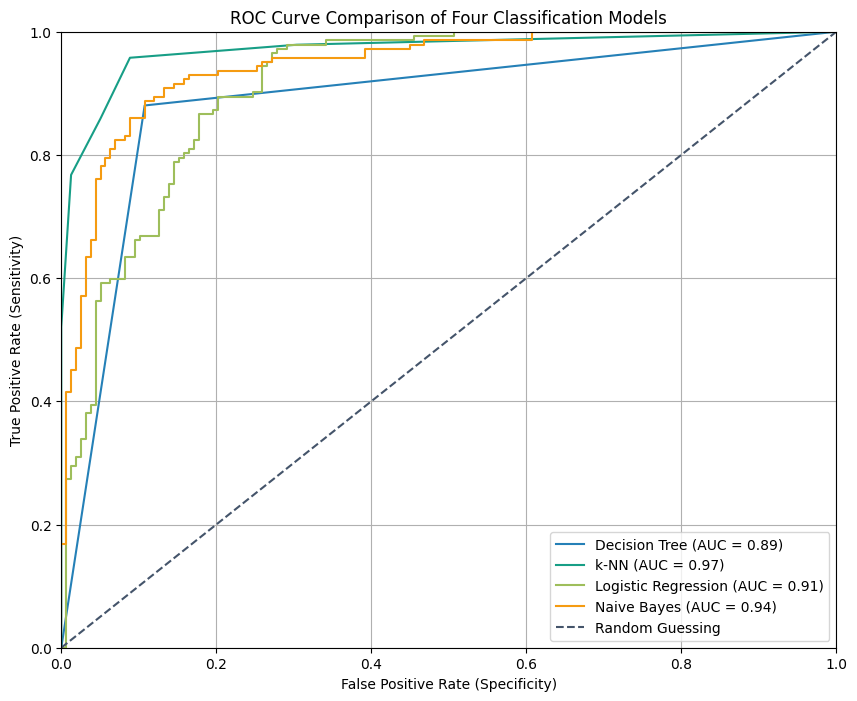

In [8]:
# Step 7: Plot ROC curves for the four models.
plt.figure(figsize=(10, 8))
plt.plot(
    fpr_tree, tpr_tree, color="#2580B7",
    label=f"Decision Tree (AUC = {roc_auc_tree:.2f})"
)
plt.plot(
    fpr_knn, tpr_knn, color="#179E86",
    label=f"k-NN (AUC = {roc_auc_knn:.2f})"
)
plt.plot(
    fpr_logistic, tpr_logistic, color="#9EBE5B",
    label=f"Logistic Regression (AUC = {roc_auc_logistic:.2f})"
)
plt.plot(
    fpr_naive_bayes, tpr_naive_bayes, color="#F59B11",
    label=f"Naive Bayes (AUC = {roc_auc_naive_bayes:.2f})"
)

# Step 8: Plot the diagonal line representing random guessing.
plt.plot(
    [0, 1], [0, 1], color="#44546A", linestyle="--", label="Random Guessing")

# Step 9: Finalize the plot.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate (Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve Comparison of Four Classification Models")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Understanding ROC Curves and AUC

**ROC Curve Interpretation:**
- **X-axis**: False Positive Rate (FPR) = FP / (FP + TN) - proportion of negative cases incorrectly classified as positive
- **Y-axis**: True Positive Rate (TPR) = TP / (TP + FN) - proportion of positive cases correctly classified as positive
- **Diagonal line**: Represents random guessing (AUC = 0.5)
- **Curve above diagonal**: Better than random performance

**AUC Score Interpretation:**
- **AUC = 1.0**: Perfect classifier
- **AUC = 0.5**: Random classifier
- **AUC < 0.5**: Worse than random (model is inverted)
- **Higher AUC**: Better discriminative ability

ROC curves help choose optimal classification thresholds and compare model performance across different operating points.